# DS106-05-10-ML - Lesson 5 Hands-On:<br>Natural Language Processing<br><br>Extra work for practice!

While looking over documentation for `nltk`, I found the list of texts included in Corpus Gutenberg — _Alice's Adventures in Wonderland_ by Lewis Carroll is included! 
    
### Goals:
- filter out words that are NOT part of the story (such as author's name, chapter numbers, etc.)
- create a plot of the most frequently mentioned characters in the story

---

## Import Packages
>- `requests` —⨠ to read in data from a webpage
>- `BeautifulSoup` —⨠ to process raw data
>- `nltk` —⨠ as the definitive natural language processing package 
>- `RegexpTokenizer` —⨠ to break down data into words
>- `matplotlib` and `seaborn` —⨠ to visualize word frequency counts
---
>- `gutenberg` to access the full Alice in Wonderland text in Gutenberg
>- `nltk.tag` and `pos_tag` to tag words as part-of-speech
>- `pandas` for dataframe tools

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#---------------------------------
from nltk.corpus import gutenberg
from nltk.tag import pos_tag
import pandas as pd

---
## Accessing Gutenberg Corpus copy of<br>_Alice in Wonderland_
[Source: nltk.org](https://www.nltk.org/book/ch02.html)

#### Literary works available from Gutenberg

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Call _Alice in Wonderland_ text

In [3]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
alice[:10]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll']

---
## Text Pre-Processing
---
### Lowercasing
Remove capitalization with a `for` loop:
1. creates a `for` loop
2. function `lower()` strips caps
3. assigns the results to a dictionary called `words`

In [4]:
aliceLower = []
for word in alice:
    aliceLower.append(word.lower())
    
aliceLower[:5]

['[', 'alice', "'", 's', 'adventures']

---
### Filtering
>- filter out stopwords
>- filter out punctuation

#### Call `nltk` list of stopwords

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

#### Filter out stopwords

In [6]:
aliceFiltered = []
for word in aliceLower:
    if word not in stopwords:
        aliceFiltered.append(word)

In [7]:
aliceFiltered[:5]

['[', 'alice', "'", 'adventures', 'wonderland']

#### Remove punctuation

In [8]:
removePunctuation = ["'", ",", "(", ")", ";", ".", "-", "!", ":", 
                     "[", "]", ",'", "!'", ".'", "?'", "--", "---",
                     ".)", "*", '"', "'--", "--'"]

In [9]:
aliceFiltered2 = []
for word in aliceFiltered:
    if word not in removePunctuation:
        aliceFiltered2.append(word)

In [10]:
aliceFiltered2[:10]

['alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 '1865',
 'chapter',
 'rabbit',
 'hole',
 'alice']

#### Remove unwanted mentions
Removing words that are not part of the story.
>- author name
>- words related to wepbage source

In [11]:
removeUnwanted = ["1865", "lewis", "carroll", "chapter", "gutenberg", 
                  "license", "ebook", "project"]

In [12]:
aliceFiltered3 = []
for word in aliceFiltered2:
    if word not in removeUnwanted:
        aliceFiltered3.append(word)

In [13]:
aliceFiltered3[:10]

['alice',
 'adventures',
 'wonderland',
 'rabbit',
 'hole',
 'alice',
 'beginning',
 'get',
 'tired',
 'sitting']

---
## Find Character Mention Frequency

#### Tag words as part-of-speech

In [14]:
aliceSpeechTag = pos_tag(aliceFiltered3)
aliceSpeechTag

[('alice', 'NN'),
 ('adventures', 'NNS'),
 ('wonderland', 'VBP'),
 ('rabbit', 'NN'),
 ('hole', 'JJ'),
 ('alice', 'NN'),
 ('beginning', 'VBG'),
 ('get', 'VB'),
 ('tired', 'JJ'),
 ('sitting', 'VBG'),
 ('sister', 'JJ'),
 ('bank', 'NN'),
 ('nothing', 'NN'),
 ('twice', 'RB'),
 ('peeped', 'VBD'),
 ('book', 'NN'),
 ('sister', 'NN'),
 ('reading', 'NN'),
 ('pictures', 'NNS'),
 ('conversations', 'NNS'),
 ('use', 'VBP'),
 ('book', 'NN'),
 ('thought', 'NN'),
 ('alice', 'NN'),
 ('without', 'IN'),
 ('pictures', 'NNS'),
 ('conversation', 'VBP'),
 ('considering', 'VBG'),
 ('mind', 'NN'),
 ('well', 'NN'),
 ('could', 'MD'),
 ('hot', 'VB'),
 ('day', 'NN'),
 ('made', 'VBN'),
 ('feel', 'NN'),
 ('sleepy', 'JJ'),
 ('stupid', 'JJ'),
 ('),', 'NN'),
 ('whether', 'IN'),
 ('pleasure', 'NN'),
 ('making', 'VBG'),
 ('daisy', 'NN'),
 ('chain', 'NN'),
 ('would', 'MD'),
 ('worth', 'VB'),
 ('trouble', 'NN'),
 ('getting', 'VBG'),
 ('picking', 'VBG'),
 ('daisies', 'NNS'),
 ('suddenly', 'RB'),
 ('white', 'JJ'),
 ('rabbit',

#### Create dataframe of words from tagged words

In [15]:
aliceSpeechTagDf = pd.DataFrame(aliceSpeechTag, columns = ['Word', 'SpeechTag'])
aliceSpeechTagDf.head()

,Word,SpeechTag
0,alice,NN
1,adventures,NNS
2,wonderland,VBP
3,rabbit,NN
4,hole,JJ


#### Create dataframe with only speech tags related to nouns — `NN`, `NNP`, `NNS`

In [16]:
aliceNounsDf = aliceSpeechTagDf.loc[aliceSpeechTagDf['SpeechTag'].isin(["NN", "NNP", "NNS"])]
aliceNounsDf = aliceNounsDf.drop(['SpeechTag'], axis=1)
aliceNounsDf.head()

,Word
0,alice
1,adventures
3,rabbit
5,alice
11,bank


#### Find Value Counts

In [17]:
aliceNounsCount = aliceNounsDf.value_counts().rename_axis('Character').to_frame('Count')

In [18]:
aliceNounsCount = aliceNounsCount.reset_index()
aliceNounsCount.head()

,Character,Count
0,alice,208
1,time,71
2,way,56
3,turtle,53
4,thing,49


#### Display entire `aliceNounsCount` dataframe

In [19]:
# Need `numpy` package
import numpy as np

In [20]:
with pd.option_context('display.max_rows', 50,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(aliceNounsCount)

       Character  Count
0          alice    208
1           time     71
2            way     56
3         turtle     53
4          thing     49
...          ...    ...
1211     pencils      1
1212  pennyworth      1
1213       desks      1
1214        desk      1
1215      zigzag      1

[1216 rows x 2 columns]


In [21]:
keepNouns = ["alice", "turtle", "rabbit", "mouse", "hatter",
             "hare", "dormouse", "gryphon", "duchess", "cat", "king",
             "queen", "baby", "birds", "pig", "children", "cats", "soldiers"]

In [22]:
aliceFilteredNouns = aliceNounsDf.loc[aliceNounsDf['Word'].isin(keepNouns)]
aliceFilteredNouns.head()

,Word
0,alice
3,rabbit
5,alice
23,alice
51,rabbit


#### Convert dataframe column to list using `Series.values.tolist()`

In [23]:
aliceCharacters = aliceFilteredNouns.Word.values.tolist()

In [24]:
aliceFreqDist = nltk.FreqDist(aliceCharacters)
aliceFreqDist

FreqDist({'alice': 208, 'turtle': 53, 'rabbit': 46, 'mouse': 36, 'hatter': 34, 'hare': 29, 'gryphon': 29, 'duchess': 27, 'cat': 27, 'dormouse': 27, ...})

---
## Data Visualization
---
### Plot Character Frequency
Plot the word freqency counts:
> 1. `sns.set()` applies default `seaborn` theme, scaling, and color palette
> 2. command `.plot()` from `matplotlib`
> 3. argument in `([integer])` specifies to plot only top `[integer]` of words

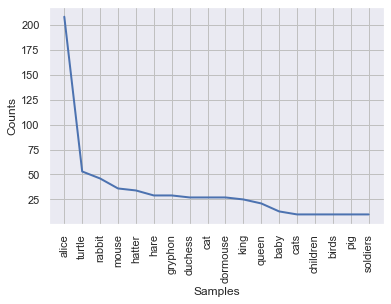

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
sns.set()
aliceFreqDist.plot(25)

---
# ☙ Fin. ❧